In [22]:
# compare algorithms
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import numpy as np
from pandas_profiling import ProfileReport

import os 
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# Load dataset
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\Machine-learning-quickbook")

ind = ['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
       'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',
       'stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring',
       'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type',
       'spore-print-color','population','habitat']
dep = 'class'

names = ind.append(dep)
dataset = pd.read_csv("mushrooms.csv")

dataset = dataset.sample(500)
dataset.reset_index(drop=True, inplace=True)

# Describe independent and dependent variables

def insert_section(n=2):
    print('\n'*n)
    print('-----------------------------------------------')

def samplesize(dataset, n=1000):
    if dataset.shape[0] > n :
        sample=n
    else :
        sample = dataset.shape[0]
    return sample

def get_label_info(dataset, varlist):
    # Get cardinality of each variable 
    for var in varlist:
        print('\n\n')
        print("Number of levels in category '{0}': \b {1:2.2f} ".format(var, dataset[var].unique().size))
        if dataset[var].unique().size < 10 :
                print("Levels for catgeory '{0}': {1}".format(var, dataset[var].unique()))


def encode_decode_frame(data):
    from collections import defaultdict
    from sklearn.preprocessing import LabelEncoder

    encoder_dict = defaultdict(LabelEncoder)
    encoded_data = data.apply(lambda x: encoder_dict[x.name].fit_transform(x))

    inverse_transform_lambda = lambda x: encoder_dict[x.name].inverse_transform(x)
    labeled_data = encoded_data.apply(inverse_transform_lambda)
    
    return encoded_data, labeled_data

In [23]:
# EDA
display(print('Display datatypes of the data'))
display(dataset.dtypes)

display(print('Null profile of the data below'))
display(dataset.isnull().sum())

display(insert_section())

get_label_info(dataset, ind)

n = samplesize(dataset,1000)
print(n)

# report
# profile = ProfileReport(dataset.sample(n))
# profile.to_file("report.html")


Display datatypes of the data


None

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Null profile of the data below


None

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64




-----------------------------------------------


None




Number of levels in category 'cap-shape':  5.00 
Levels for catgeory 'cap-shape': ['k' 'f' 'b' 'x' 's']



Number of levels in category 'cap-surface':  3.00 
Levels for catgeory 'cap-surface': ['s' 'f' 'y']



Number of levels in category 'cap-color':  8.00 
Levels for catgeory 'cap-color': ['e' 'n' 'w' 'c' 'g' 'b' 'y' 'p']



Number of levels in category 'bruises':  2.00 
Levels for catgeory 'bruises': ['f' 't']



Number of levels in category 'odor':  9.00 
Levels for catgeory 'odor': ['s' 'f' 'l' 'n' 'a' 'y' 'c' 'p' 'm']



Number of levels in category 'gill-attachment':  2.00 
Levels for catgeory 'gill-attachment': ['f' 'a']



Number of levels in category 'gill-spacing':  2.00 
Levels for catgeory 'gill-spacing': ['c' 'w']



Number of levels in category 'gill-size':  2.00 
Levels for catgeory 'gill-size': ['n' 'b']



Number of levels in category 'gill-color':  12.00 



Number of levels in category 'stalk-shape':  2.00 
Levels for catgeory 'stalk-shape': ['t' 'e']



In [ ]:
# TPOT to use for real dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier

# define dataset
X = dataset[ind]
Y = dataset[dep]

# Encoding the dataframe's predictors
encoded_x, decoded_x = encode_decode_frame(X)

# train-test split using encoded X variable
train_x, test_x, train_y, test_y = train_test_split( encoded_x.values, Y.values, test_size=0.20, random_state=1, shuffle=True)

In [ ]:
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)

# define search
model = TPOTClassifier(generations=100, population_size=500, cv=cv
                       , scoring='f1', verbosity=2, random_state=1
                       , n_jobs=-1, early_stop=2)


# perform the search
model.fit(train_x, train_y)
print(model.score(test_x, test_y))


# export the best model
model.export('tpot_best_model.py')

In [ ]:
# adding manual methods of testing

In [ ]:
# Split-out validation dataset
array = dataset.values
X = dataset[ind]
Y = dataset[dep]
train_x, test_x, train_y, test_y = train_test_split( X.values, Y.values, test_size=0.20, random_state=1, shuffle=True)



In [ ]:
# Spot Check Algorithms (manual process)
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [48]:
# Good way of handling the data 
import timeit, os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as mpl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, normalize
from sklearn.impute import SimpleImputer 
from tpot import TPOTRegressor, TPOTClassifier

from sklearn.model_selection import RepeatedStratifiedKFold

# Load dataset
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\Machine-learning-quickbook")
ind = ['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
       'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',
       'stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring',
       'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type',
       'spore-print-color','population','habitat']
dep = ['class']

dataset = pd.read_csv("mushrooms.csv")

X = dataset.reindex(columns=[x for x in dataset.columns.values if x != 'class'])        # separate out X
y = dataset.reindex(columns=['class'])   # separate out y

X = dataset.reindex(columns=ind)        # separate out X
y = dataset.reindex(columns=dep)   # separate out y
y = np.ravel(y)                          # flatten the y array

# make list of numeric and string columns
numeric_cols = [] # could still have ordinal data
string_cols = []  # could have ordinal or nominal data

for col in X.columns:
    if (X.dtypes[col] == np.int64 or X.dtypes[col] == np.int32 or X.dtypes[col] == np.float64):
        numeric_cols.append(col)      # True integer or float columns
    
    if (X.dtypes[col] == np.object):  # Nominal and ordinal columns
        string_cols.append(col)

In [49]:
# Dealing with string variables (simplest form of imputation for missing as acreating a new label)
X_string = X[string_cols]
X_string = X_string.fillna("missing")
X_string = X_string.apply(LabelEncoder().fit_transform)  

In [50]:
# Dealing with numeric variables
n_imputer = SimpleImputer(missing_values='NaN', copy = True, strategy = 'most_frequent') # imputing with most frequent because some of these numeric columns are ordinal

X_numeric = X[numeric_cols]

if X_numeric.shape[1] > 0:
    X_numeric = n_imputer.fit_transform(X_numeric)
    X_numeric = pd.DataFrame(X_numeric, columns = numeric_cols)
else:
    pass
    

In [51]:
y_encoded = LabelEncoder().fit_transform(y) 
display(y_encoded)

X = pd.concat([X_numeric, X_string], axis=1)
display(X.info())
X_encoded = X.values
display(X_encoded)

array([1, 0, 0, ..., 0, 1, 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 8124 non-null   int32
 1   cap-surface               8124 non-null   int32
 2   cap-color                 8124 non-null   int32
 3   bruises                   8124 non-null   int32
 4   odor                      8124 non-null   int32
 5   gill-attachment           8124 non-null   int32
 6   gill-spacing              8124 non-null   int32
 7   gill-size                 8124 non-null   int32
 8   gill-color                8124 non-null   int32
 9   stalk-shape               8124 non-null   int32
 10  stalk-root                8124 non-null   int32
 11  stalk-surface-above-ring  8124 non-null   int32
 12  stalk-surface-below-ring  8124 non-null   int32
 13  stalk-color-above-ring    8124 non-null   int32
 14  stalk-color-below-ring    8124 non-null 

None

array([[5, 2, 4, ..., 2, 3, 5],
       [5, 2, 9, ..., 3, 2, 1],
       [0, 2, 8, ..., 3, 2, 3],
       ...,
       [2, 2, 4, ..., 0, 1, 2],
       [3, 3, 4, ..., 7, 4, 2],
       [5, 2, 4, ..., 4, 1, 2]])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size = .25, random_state = 55)

display(X_train)
display(y_train)


array([[5, 2, 2, ..., 7, 4, 4],
       [5, 3, 9, ..., 1, 5, 0],
       [5, 0, 3, ..., 1, 5, 1],
       ...,
       [2, 3, 3, ..., 1, 5, 4],
       [5, 3, 9, ..., 1, 5, 0],
       [5, 3, 7, ..., 1, 4, 0]])

array([1, 1, 1, ..., 1, 1, 0])

In [53]:

# instantiate tpot 
tpot = TPOTRegressor(verbosity=2,  
                    random_state=1, 
                    scoring='f1',
                    periodic_checkpoint_folder="intermediate_results",
                    n_jobs=5, 
                    warm_start = False,
                    generations=100, 
                    population_size=250,
                    early_stop=5)
times = []
scores = []
winning_pipes = []

# run 2 iterations
for x in range(1):
    start_time = timeit.default_timer()
    tpot.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test, y_test))
    tpot.export(str(x)+'_tpot_reg.py')

# output results
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)


Generation 1 - Current best internal CV score: 1.0
Generation 2 - Current best internal CV score: 1.0
Generation 3 - Current best internal CV score: 1.0
Generation 4 - Current best internal CV score: 1.0
Generation 5 - Current best internal CV score: 1.0
Generation 6 - Current best internal CV score: 1.0
The optimized pipeline was not improved after evaluating 5 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: KNeighborsRegressor(input_matrix, n_neighbors=1, p=1, weights=distance)
Times: [12.70494532833333]
Scores: [1.0]
Winning pipelines: [Pipeline(steps=[('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=1, p=1, weights='distance'))])]


In [58]:
# initiate tpot 
tpot = TPOTClassifier(verbosity=2,
                      random_state=1,
                      scoring='f1',
                      periodic_checkpoint_folder="intermediate_results",
                      n_jobs=5,
                      warm_start = False,
                      generations=100, 
                      population_size=250,
                      early_stop=5)
times = []
scores = []
winning_pipes = []

# run 2 iterations
for x in range(1):
    start_time = timeit.default_timer()
    tpot.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test, y_test))
    tpot.export(str(x)+'_tpot_clf.py')

# output results
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)


Generation 1 - Current best internal CV score: 1.0
Generation 2 - Current best internal CV score: 1.0
Generation 3 - Current best internal CV score: 1.0
Generation 4 - Current best internal CV score: 1.0
Generation 5 - Current best internal CV score: 1.0
Generation 6 - Current best internal CV score: 1.0
The optimized pipeline was not improved after evaluating 5 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.3, min_samples_leaf=13, min_samples_split=19, n_estimators=100)
Times: [54.977980108333334]
Scores: [1.0]
Winning pipelines: [Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
                                        max_features=0.3, min_samples_leaf=13,
                                        min_samples_split=19,
                           

In [60]:
# Average CV score on the training set was: 1.0
from sklearn.ensemble import RandomForestClassifier
exported_pipeline = RandomForestClassifier(bootstrap=False, criterion="entropy", max_features=0.3, min_samples_leaf=13, min_samples_split=19, n_estimators=100)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 1)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)

In [70]:
exctracted_best_model = tpot.fitted_pipeline_.steps[-1][1]
exctracted_best_model.feature_importances_

array([0.00318714, 0.00953237, 0.01109185, 0.03118793, 0.16981897,
       0.0020398 , 0.04849734, 0.1059769 , 0.12948081, 0.02626581,
       0.0494543 , 0.04443033, 0.03726425, 0.01693418, 0.01675206,
       0.        , 0.00187   , 0.01506465, 0.0730114 , 0.12716959,
       0.05238828, 0.02858204])

NameError: name 'ax' is not defined

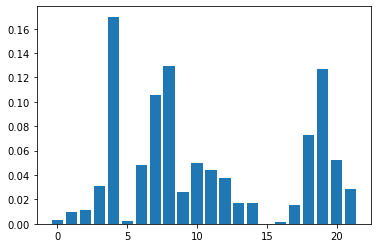

In [77]:
# plot feature importance 
sns.barplot(X.columns.values, exctracted_best_model.feature_importances_)
mpl.xticks(rotation=90)
mpl.tight_layout()

In [76]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [82]:
sns.catplot(x=X.columns.values, y=exctracted_best_model.feature_importances_, kind="bar",
                height=4, aspect=.7)

TypeError: object of type 'NoneType' has no len()

In [79]:
type(exctracted_best_model.feature_importances_)

numpy.ndarray

In [81]:
type(X.columns.values)

numpy.ndarray

C:\Users\manka\miniconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


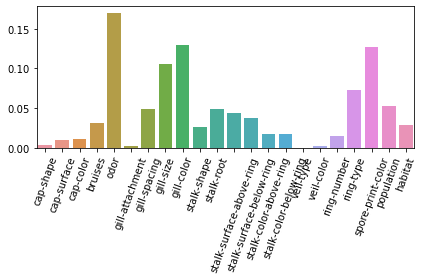

0.9999999999999999